<a href="https://colab.research.google.com/github/ryosuke1224-haas/Decision_Tree/blob/main/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees

## About the dataset
This assignment uses a dataset obtained from the JSE Data Archive that contains biological and self-reported activity traits of a sample of college students at a single university uploaded in 2013. The study associated with these data focused on exploring if a correspondence exists between eye color and and other traits. You will be using gender as the target/label in this lab.

FEATURE DESCRIPTIONS: 
- Color (Blue, Brown, Green, Hazel, Other)
- Age (in years)
- YearinSchool (First, Second, Third, Fourth, Other)
- Height (in inches)
- Miles (distance from home town of student to Ames, IA) 
- Brothers (number of brothers)
- Sisters (number of sisters)
- CompTime (number of hours spent on computer per week)
- Exercise (whether the student exercises Yes or No)
- ExerTime (number of hours spent exercising per week)
- MusicCDs (number of music CDs student owns)
- PlayGames (number of hours spent playing games per week)
- WatchTV (number of hours spent watching TV per week

https://ww2.amstat.org/publications/jse/jse_data_archive.htm (eyecolorgenderdata.csv)


In [51]:
from collections import Counter, defaultdict
from itertools import combinations 
import pandas as pd
import numpy as np
import operator
import math
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

!wget -nc http://people.ischool.berkeley.edu/~zp/course_datasets/eye_color.zip
!unzip -u eye_color.zip
!ls
df = pd.read_csv('Eye_Color.csv')
# remove NA's and reset the index
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df = df.reset_index(drop=True)

df.head()

URL transformed to HTTPS due to an HSTS policy
File ‘eye_color.zip’ already there; not retrieving.

Archive:  eye_color.zip
Eye_Color.csv  Eye_Color_Dataset_Description.txt  eye_color.zip  sample_data


,gender,age,year,eyecolor,height,miles,brothers,sisters,computertime,exercise,exercisehours,musiccds,playgames,watchtv
0,female,18,first,hazel,68.0,195.0,0,1,20.0,Yes,3.0,75.0,6.0,18.0
1,male,20,third,brown,70.0,120.0,3,0,24.0,No,0.0,50.0,0.0,3.0
2,female,18,first,green,67.0,200.0,0,1,35.0,Yes,3.0,53.0,8.0,1.0
3,male,23,fourth,hazel,74.0,140.0,1,1,5.0,Yes,25.0,50.0,0.0,7.0
4,female,19,second,blue,62.0,60.0,0,1,5.0,Yes,4.0,30.0,2.0,5.0


# **EDA** 

female    1078
male       910
Name: gender, dtype: int64


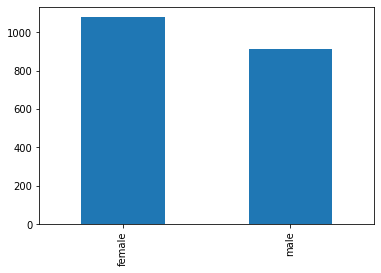

In [52]:
# How many males and females exist in the dataset?
df['gender'].value_counts().plot(kind='bar')
print(df['gender'].value_counts())

In [53]:
#Age distribusion
def ntile(a,n):
  q = a.quantile(np.linspace(1/n,1,n))
  output = []
  for i in a:
    if np.isnan(i):
      k = np.nan
    else:
      k = 0
      for j in q:
        if i<=j:
          break
        k += 1
        
    output.append(k)

  return np.array(output)

df['age_dec']=ntile(df['age'],5)

In [54]:
print(df['age_dec'].value_counts())
print(df[['age','age_dec']].groupby('age_dec').mean())

1    639
0    596
4    387
3    366
Name: age_dec, dtype: int64
               age
age_dec           
0        18.768456
1        20.000000
3        21.000000
4        24.242894


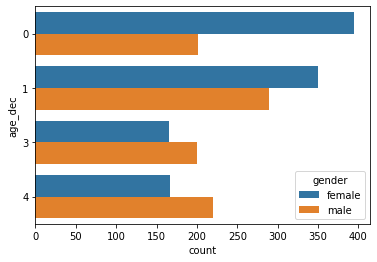

In [55]:
sns.countplot(y="age_dec", hue="gender", data=df)

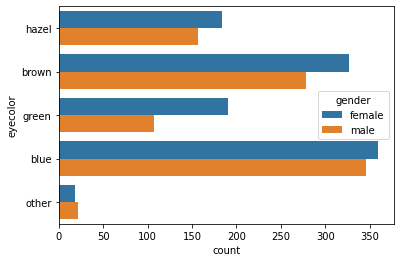

In [56]:
#Eye color and gender
sns.countplot(y="eyecolor", hue="gender", data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


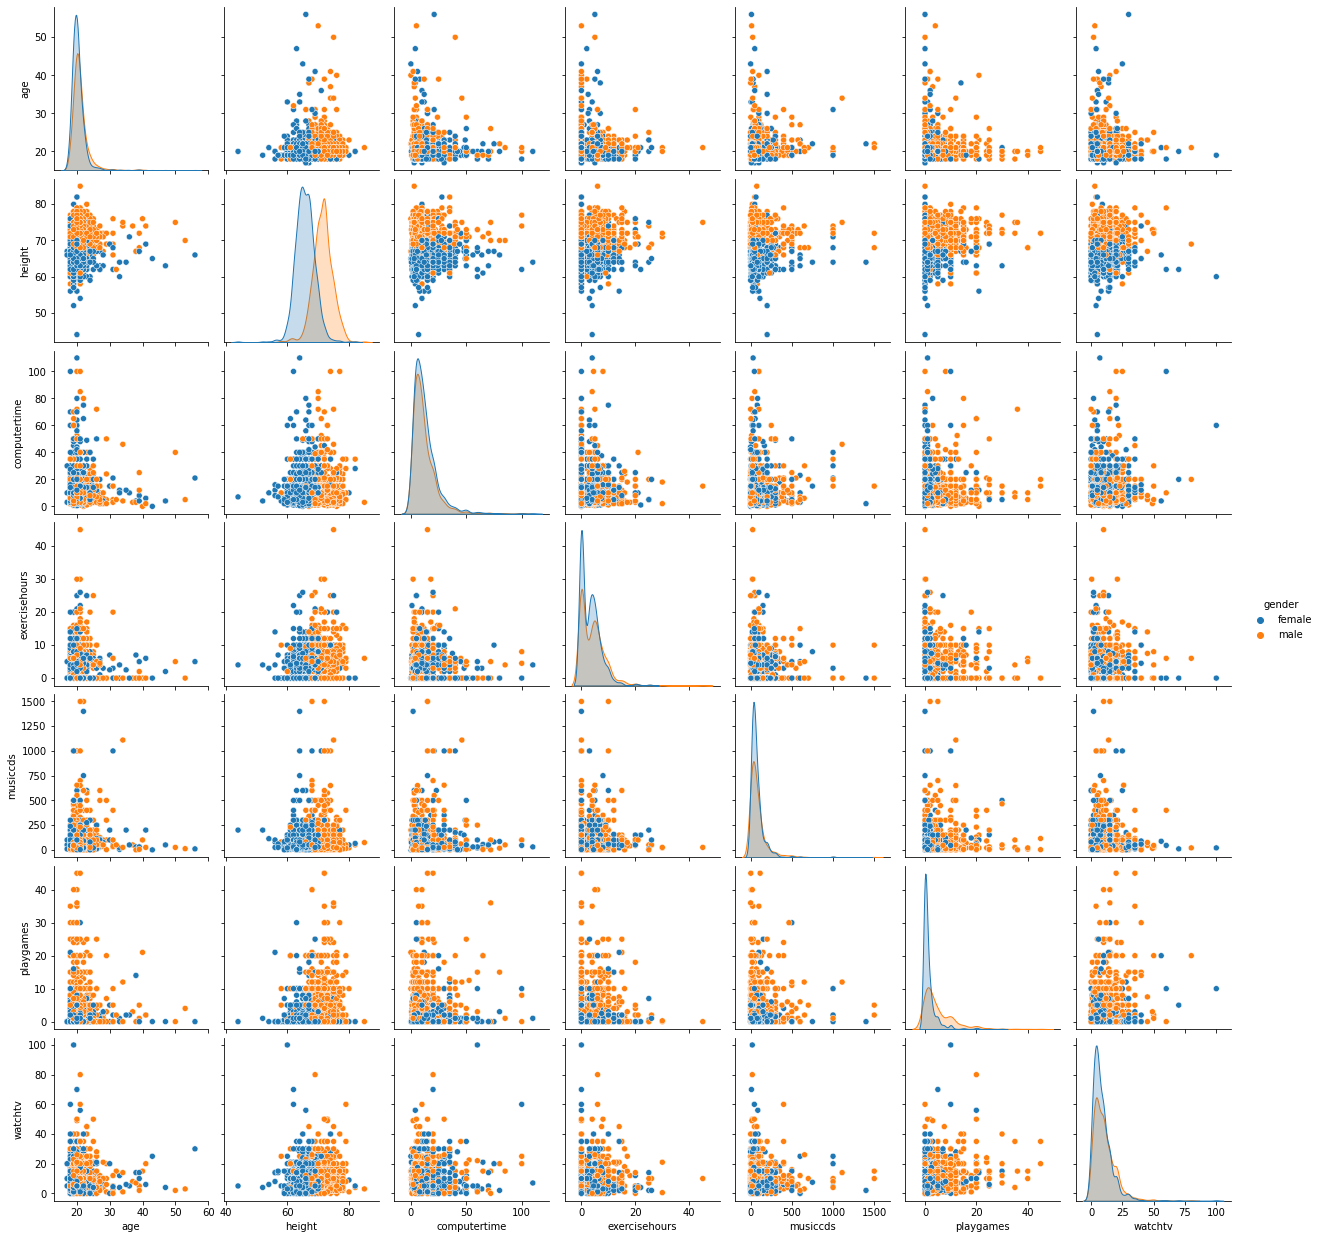

In [57]:
sns.pairplot(df[['gender','age','height','computertime','exercisehours','musiccds','playgames','watchtv']], hue="gender", size=2.5)

In [58]:
# Manually calculate the Gini index(Use males and females as the target classes)
num_males = 910 
num_females = 1078 
total=num_males+num_females
percent_male=num_males/total
percent_female=num_females/total
gini_index=1-((percent_male**2)+(percent_female**2))
print(gini_index)

0.4964292799047807


#Find the the best split point of the 'height' feature.

In [59]:
def gini_index(df):
  df_height=df.sort_values(by=['height'],ascending=False)
  df_height=df_height[['gender','height']]
  total=num_males+num_females
  percent_male=num_males/total
  percent_female=num_females/total
  gini_index=1-((percent_male**2)+(percent_female**2))
  split=[]
  Delta=[]
  Gini_child=[]
  unique_heights=sorted(df['height'].unique(), reverse=True)
  all_midpoints = ((a + b)/2 for a,b in zip(unique_heights[::1],unique_heights[1::1]))
  all_midpoints = list(all_midpoints)#list of midpoint
  for i in all_midpoints:
      df_a=df_height[df_height['height']>=i]
      df_b=df_height[df_height['height']<i]
      total=len(df)
      total_a=len(df_a)
      total_b=len(df_b)
      percent_male_a=(df_a['gender'][df_a['gender']=='male'].count())/total_a
      percent_male_b=(df_b['gender'][df_b['gender']=='male'].count())/total_b
      percent_female_a=(df_a['gender'][df_a['gender']=='female'].count())/total_a
      percent_female_b=(df_b['gender'][df_b['gender']=='female'].count())/total_b
      gini_a=1-((percent_male_a**2)+(percent_female_a**2))
      gini_b=1-((percent_male_b**2)+(percent_female_b**2))
      gini_child=((total_a/total)*gini_a)+((total_b/total)*gini_b)
      delta=gini_index-gini_child
      split.append(i)
      Delta.append(delta)
      Gini_child.append(gini_child)
      
  Split_delta=pd.DataFrame({"Split":split,
                          "Delta":Delta,
                          "Gini_child":Gini_child
                          })
  Split_order=Split_delta.sort_values(by='Delta',ascending=False)
  return Split_order[0:1]
  raise NotImplementedError()

gini_index(df)

,Split,Delta,Gini_child
13,68.5,0.2309,0.265529


In [60]:
# Check how many 'female' and 'male' rows are shorter than the best height split point
df_shorter=df[df['height']<68.5]
df_shorter['gender'].value_counts()

female    905
male      142
Name: gender, dtype: int64

In [61]:
# Check how many 'female' and 'male' rows are taller than the best height split point?
df_taller=df[df['height']>=68.5]
df_taller['gender'].value_counts()

male      768
female    173
Name: gender, dtype: int64

Manually calculate the Gini index(Use males and females as the target classes)
Best Split of a Categorial Variable

Check the number of possible splits of the eyecolor feature? (Assuming binary split)


In [62]:
# create the combinations
import itertools
Combo=[]
for i in range(0, len(df['eyecolor'].unique())+1):
    for combo in itertools.combinations(df['eyecolor'].unique(), i):
      Combo.append(combo)
len(Combo)

32

In [63]:
for i in range(len(Combo)):
  print(Combo[i])

()
('hazel',)
('brown',)
('green',)
('blue',)
('other',)
('hazel', 'brown')
('hazel', 'green')
('hazel', 'blue')
('hazel', 'other')
('brown', 'green')
('brown', 'blue')
('brown', 'other')
('green', 'blue')
('green', 'other')
('blue', 'other')
('hazel', 'brown', 'green')
('hazel', 'brown', 'blue')
('hazel', 'brown', 'other')
('hazel', 'green', 'blue')
('hazel', 'green', 'other')
('hazel', 'blue', 'other')
('brown', 'green', 'blue')
('brown', 'green', 'other')
('brown', 'blue', 'other')
('green', 'blue', 'other')
('hazel', 'brown', 'green', 'blue')
('hazel', 'brown', 'green', 'other')
('hazel', 'brown', 'blue', 'other')
('hazel', 'green', 'blue', 'other')
('brown', 'green', 'blue', 'other')
('hazel', 'brown', 'green', 'blue', 'other')


In [64]:
df[~df['eyecolor'].isin(Combo[5])]

,gender,age,year,eyecolor,height,miles,brothers,sisters,computertime,exercise,exercisehours,musiccds,playgames,watchtv,age_dec
0,female,18,first,hazel,68.0,195.0,0,1,20.0,Yes,3.0,75.0,6.0,18.0,0
1,male,20,third,brown,70.0,120.0,3,0,24.0,No,0.0,50.0,0.0,3.0,1
2,female,18,first,green,67.0,200.0,0,1,35.0,Yes,3.0,53.0,8.0,1.0,0
3,male,23,fourth,hazel,74.0,140.0,1,1,5.0,Yes,25.0,50.0,0.0,7.0,4
4,female,19,second,blue,62.0,60.0,0,1,5.0,Yes,4.0,30.0,2.0,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,female,21,fourth,hazel,63.0,180.0,2,1,15.0,No,0.0,3.0,1.0,1.0,3
1984,female,20,third,green,64.0,90.0,0,2,12.0,Yes,12.0,100.0,1.0,5.0,1
1985,female,18,first,blue,66.0,110.0,0,1,14.0,No,0.0,239.0,2.0,10.0,0
1986,male,19,second,blue,73.0,140.0,0,1,4.0,Yes,6.0,45.0,7.0,12.0,0


In [65]:
len(Combo)-2

30

In [66]:
#  Which split of eyecolor best splits the female and male rows, as measured by the Gini Index?
def gini_eye(df):
  df_eyecolor=df[['gender','eyecolor']]
  total=num_males+num_females
  percent_male=num_males/total
  percent_female=num_females/total
  gini_index=1-((percent_male**2)+(percent_female**2))
  split=[]
  Delta=[]
  Gini_child=[]
  Combo=[]
  for i in range(1, len(df_eyecolor['eyecolor'].unique())+1):
    for combo in itertools.combinations(df['eyecolor'].unique(), i):
      Combo.append(combo)
      for i in range(len(Combo)):
        df_a=df_eyecolor[df_eyecolor['eyecolor'].isin(Combo[i])]
        df_b=df_eyecolor[~df_eyecolor['eyecolor'].isin(Combo[i])]
        total=len(df)
        total_a=len(df_a)
        total_b=len(df_b)
        percent_male_a=(df_a['gender'][df_a['gender']=='male'].count())/total_a
        percent_male_b=(df_b['gender'][df_b['gender']=='male'].count())/total_b
        percent_female_a=(df_a['gender'][df_a['gender']=='female'].count())/total_a
        percent_female_b=(df_b['gender'][df_b['gender']=='female'].count())/total_b
        gini_a=1-((percent_male_a**2)+(percent_female_a**2))
        gini_b=1-((percent_male_b**2)+(percent_female_b**2))
        gini_child=((total_a/total)*gini_a)+((total_b/total)*gini_b)
        delta=gini_index-gini_child
        split.append(Combo[i])
        Delta.append(delta)
        Gini_child.append(gini_child)
  Split_delta=pd.DataFrame({"Split":split,
                          "Delta":Delta,
                          "Gini_child":Gini_child
                          })
  Split_order=Split_delta.sort_values(by='Delta',ascending=False)
  return Split_order[0:1]

In [67]:
gini_eye(df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in long_scalars


,Split,Delta,Gini_child
23,"(green,)",0.003338,0.493092


In [68]:
# check # of male and female in each partition
df_green=df[df['eyecolor']=='green']
print(df_green['gender'].value_counts())
df_other=df[~(df['eyecolor']=='green')]
print(df_other['gender'].value_counts())


female    190
male      107
Name: gender, dtype: int64
female    888
male      803
Name: gender, dtype: int64


## Training a decision tree
Train a decision tree using all the dataset

In [69]:
#In the colum 'year', there is one element 'first"' instead of just first, I will change that to just 'first' **
df[df['year']=='first"']

,gender,age,year,eyecolor,height,miles,brothers,sisters,computertime,exercise,exercisehours,musiccds,playgames,watchtv,age_dec
805,female,19,"first""",blue,68.0,250.0,2,0,12.0,Yes,5.0,24.0,0.0,7.0,0


In [70]:
df['year']=df['year'].str.replace('"','')

In [71]:
print(df['year'].unique())

['first' 'third' 'fourth' 'second' 'other']


In [72]:
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

vec = DictVectorizer(sparse=True, dtype=int)

df_input=df.drop(['gender'],axis=1)
df_input=df_input.to_dict('records')
df_input=vec.fit_transform(df_input).toarray()


le = preprocessing.LabelEncoder()
le.fit(["male", "female"])
target = le.transform(df['gender'])

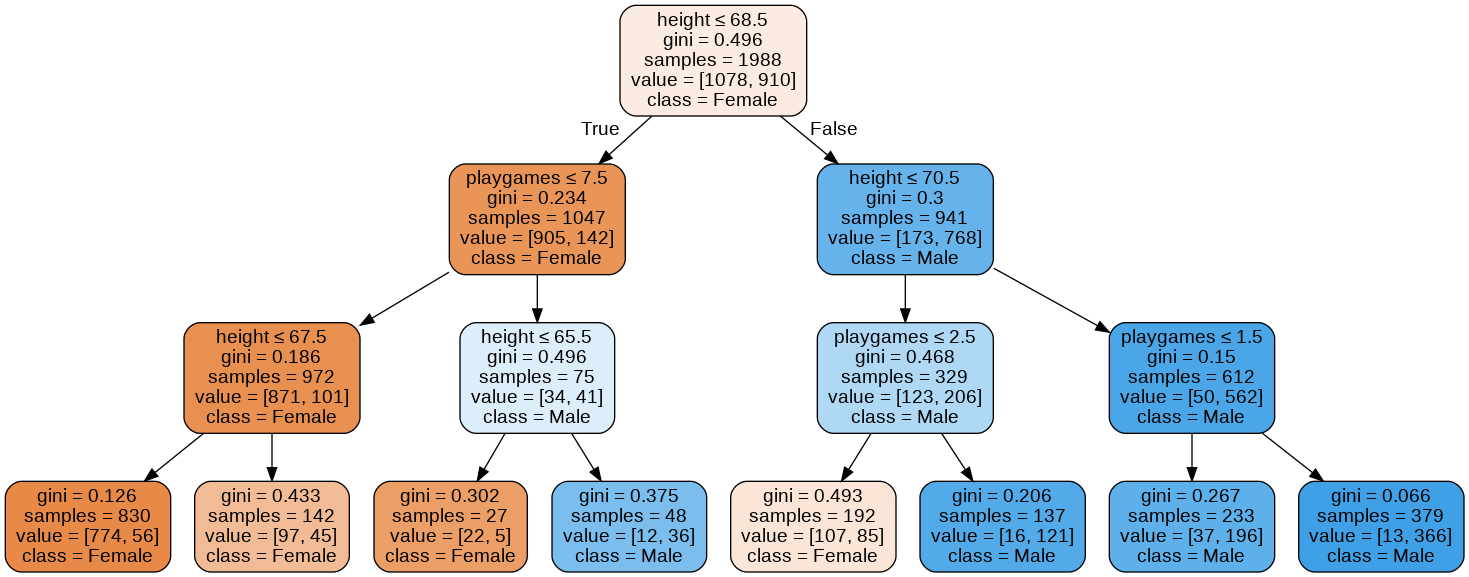

In [73]:
from IPython.display import Image  
import pydotplus 
import pydot
from sklearn.externals.six import StringIO
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(df_input, target)

clf =  clf.fit(df_input, target)
dotfile = StringIO() 
tree.export_graphviz(clf, out_file=dotfile,
                      feature_names=vec.get_feature_names(),  
                          class_names=['Female', 'Male'],
                      max_depth=3,  
                          filled=True, rounded=True,  
                          special_characters=True)
graph = pydotplus.graph_from_dot_data(dotfile.getvalue())
Image(graph.create_png())


#Ignore the cell below, but do not delete it. It is used to grade the image output of this cell.

In [74]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
pre_dt=clf.predict(df_input)

print('accuracy_score')
print(accuracy_score(target, pre_dt))
print("=====================================")
co_mat_dt = metrics.confusion_matrix(target, pre_dt)
print('confusion matrix:')
print(co_mat_dt)
cl_repo_dt = metrics.classification_report(target, pre_dt)
print("=====================================")
print("=====================================")
print('classification report:')
print(cl_repo_dt)

accuracy_score
0.8646881287726358
confusion matrix:
[[1000   78]
 [ 191  719]]
classification report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1078
           1       0.90      0.79      0.84       910

    accuracy                           0.86      1988
   macro avg       0.87      0.86      0.86      1988
weighted avg       0.87      0.86      0.86      1988



The first node:it split the sample with height. if height is smaller or equal to 68.5, they are more likely to be female and if it is above that, they are more likely to be male

The second level on the left: within the group whose height are smaller or equal to 68.5, if they play games less than or equall to 7.5 hours, they are morelikely to be female and if they play more than that, they are likley to be male

Second line on the right:if they are taler than 70.5, they are more likely to be male, though in this node, even though people are shorter than that, they are next node is male dominant node

Third line on the left:within the group who are shorter or equall to 68.5 and play less than 7.5 hours of games, if they are shorter or equall to 67.5, they are more likely to be female. however, even when they are taller than 67.5, lead node is female dominant but less concentrated.

Third line on the second left:within people who are shorter than 68.5 but play more than 7.5 hours of game, if they are shorter or equal to 65.5, they are morelikely to be female. if not, they are more likely to be male

Thir line on the second from right:Within people whose height are between 68.5 and 70.5, if they play less than 2.5 hours of game, they are more likely to be female and if not, they are more likely to be male

Thir line on the right:within people who are toller than 70.5, if they play more than 1.5 hours of game, they are more likely to be male. if not, the lead node is still male dominant but less concentrated


Check the percentage of 'female' in the last nodes


In [75]:
name=pd.DataFrame(clf.tree_.feature)
each=pd.DataFrame(np.concatenate(clf.tree_.value))
total=pd.DataFrame(clf.tree_.n_node_samples)
df_node_info=pd.concat([name,each,total],axis=1)
df_node_info.columns=['name','female','male','total']
df_leaf=df_node_info[df_node_info['name']==-2]
female_ratio=(df_leaf['female']/df_leaf['total'])*100
female_ratio=np.array(female_ratio)
np.set_printoptions(precision=2)
female_ratio

array([93.25, 68.31, 81.48, 25.  , 55.73, 11.68, 15.88,  3.43])